In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv("../data/cleaned_heart_disease.csv")

In [3]:
df.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,1.007386,0.705176,0.303643,0.489727,1.368109,-0.361400,-0.871794,1,0,...,0,1,1,0,0,0,0,0,0,0
1,2,1.432034,1.518569,0.789967,-1.181478,0.611589,4.411152,0.879408,1,0,...,0,0,0,0,0,1,1,0,1,0
2,3,1.432034,-0.650479,0.266939,-0.345875,1.651804,2.820301,0.003807,1,0,...,0,0,0,0,0,1,1,0,0,1
3,4,-1.752828,-0.108217,0.459634,1.961979,2.502889,-0.361400,-0.871794,1,0,...,1,0,0,1,0,0,0,0,1,0
4,5,-1.328180,-0.108217,0.037541,1.365120,0.517024,-0.361400,-0.871794,0,0,...,0,0,0,0,0,0,0,1,1,0


In [5]:
X_df = df.drop(columns=['id','num'])

print("Dataset shape for clustering:", X_df.shape)

Dataset shape for clustering: (920, 21)


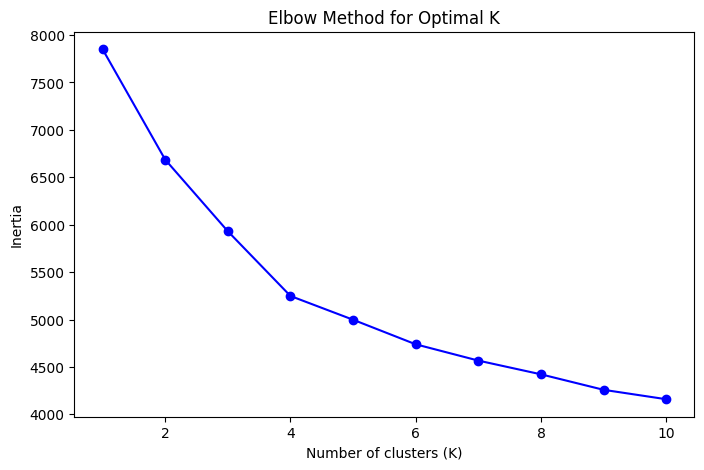

In [12]:
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_cluster'] = kmeans.fit_predict(X_df)

print(df['KMeans_cluster'].value_counts())

KMeans_cluster
0    341
2    310
3    166
1    103
Name: count, dtype: int64


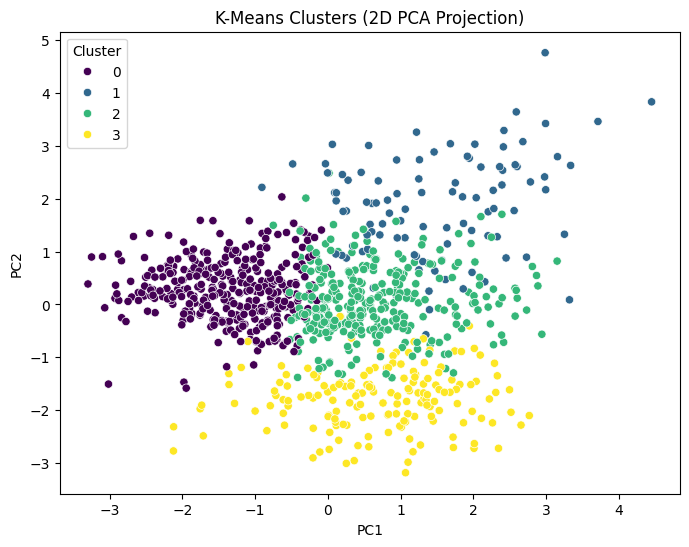

In [30]:
pca = PCA(n_components=4, random_state=42)
pca_data = pca.fit_transform(X_df)

df_pca_plot = pd.DataFrame({
    'PC1': pca_data[:,0],
    'PC2': pca_data[:,1],
    'Cluster': df['KMeans_cluster']  
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca_plot, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-Means Clusters (2D PCA Projection)')
plt.show()

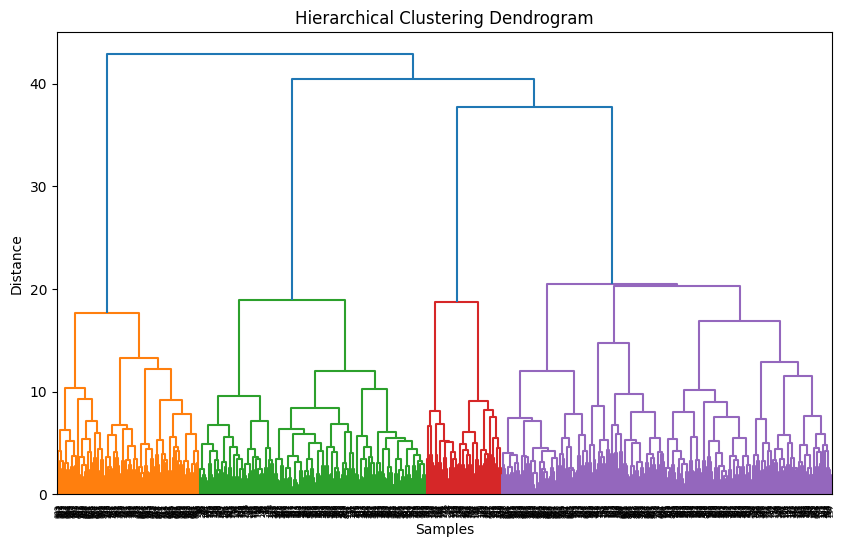

In [33]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_df, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [37]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(X_df)

print(df['Hierarchical_Cluster'].value_counts())


Hierarchical_Cluster
0    392
2    270
3    169
1     89
Name: count, dtype: int64


In [44]:
y_true = df['num'].round().astype(int)
y_pred_kmeans = df['KMeans_cluster']
y_pred_hierar = df['Hierarchical_Cluster']

cm_kmeans = confusion_matrix(y_true, y_pred_kmeans)
ari_kmeans = adjusted_rand_score(y_true, y_pred_kmeans)

cm_hierar = confusion_matrix(y_true, y_pred_hierar)
ari_hierar = adjusted_rand_score(y_true, y_pred_hierar)


print("K-Means Confusion Matrix:\n", cm_kmeans)
print("Adjusted Rand Index (K-Means):", ari_kmeans)

print("\nHierarchical Confusion Matrix:\n", cm_hierar)
print("Adjusted Rand Index (Hierarchical):", ari_hierar)

K-Means Confusion Matrix:
 [[  0 269  21 102  19]
 [  0  61  20 125  59]
 [  0   5  25  34  45]
 [  0   5  27  38  37]
 [  0   1  10  11   6]]
Adjusted Rand Index (K-Means): 0.20206791974184563

Hierarchical Confusion Matrix:
 [[  0 130  29 233  19]
 [  0 155  16  33  61]
 [  0  44  17   2  46]
 [  0  48  20   2  37]
 [  0  15   7   0   6]]
Adjusted Rand Index (Hierarchical): 0.1545621339711576
